In [3]:
#initially we are going to load the traffic dataset which has the columns DateTime, Junction, Vehicles and ID.

import pandas as pd

df = pd.read_csv("traffic_data.csv")

df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [12]:
#let's examine the dataset- Exploratory Data Analysis 

# Now, we should convert the column DateTime to the DateTime object. It helps to extract the date, time, day and other features.

df['DateTime'] = pd.to_datetime(df['DateTime'])

df['DateTime'].dtype

df.isnull().sum()

df.duplicated().sum()

0

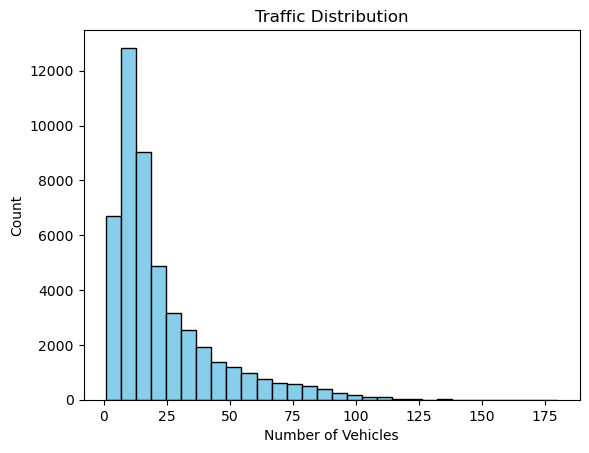

In [46]:

import matplotlib.pyplot as plt

plt.hist(df['Vehicles'], bins=30, color='skyblue', edgecolor='black')
plt.title('Traffic Distribution')
plt.xlabel('Number of Vehicles')
plt.ylabel('Count')

plt.show()

In [26]:
df['Vehicles'].value_counts()

Vehicles
8      2325
9      2290
7      2220
6      2206
10     2145
       ... 
129       1
141       1
135       1
143       1
162       1
Name: count, Length: 141, dtype: int64

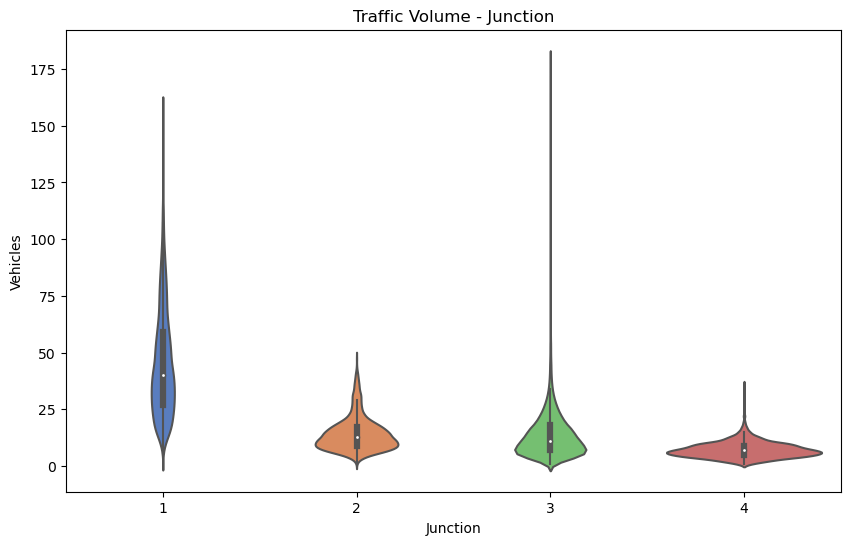

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(x='Junction', y='Vehicles', data=df, palette='muted')
plt.title('Traffic Volume - Junction')
plt.xlabel('Junction')
plt.ylabel('Vehicles')
plt.show()

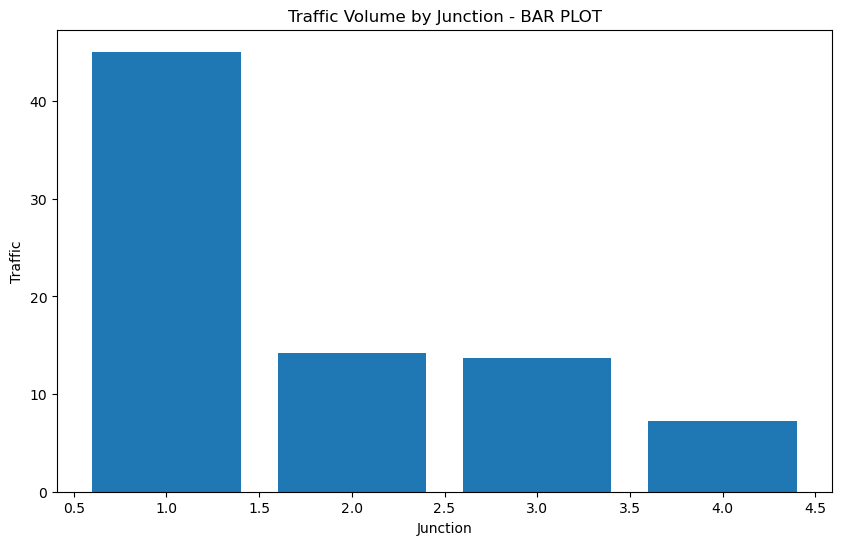

In [222]:
import pandas as pd

df = pd.read_csv("traffic_data.csv")

df.head()

jun_display = df.groupby('Junction')['Vehicles'].mean().reset_index()

plt.bar(jun_display['Junction'], jun_display['Vehicles'])
plt.title('Traffic Volume by Junction - BAR PLOT')
plt.xlabel('Junction')
plt.ylabel('Traffic')
plt.show()

In [51]:
df['Hour'] = df['DateTime'].dt.hour

df['Day'] = df['DateTime'].dt.day_name()

df 

,DateTime,Junction,Vehicles,ID,Hour,Day
0,2015-11-01 00:00:00,1,15,20151101001,0,Sunday
1,2015-11-01 01:00:00,1,13,20151101011,1,Sunday
2,2015-11-01 02:00:00,1,10,20151101021,2,Sunday
3,2015-11-01 03:00:00,1,7,20151101031,3,Sunday
4,2015-11-01 04:00:00,1,9,20151101041,4,Sunday
...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194,19,Friday
48116,2017-06-30 20:00:00,4,30,20170630204,20,Friday
48117,2017-06-30 21:00:00,4,16,20170630214,21,Friday
48118,2017-06-30 22:00:00,4,22,20170630224,22,Friday


In [90]:
hourly_traffic_analysis = df.groupby('Hour')['Vehicles'].mean().reset_index()


weekly_traffic_analysis = df.groupby('Day')['Vehicles'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

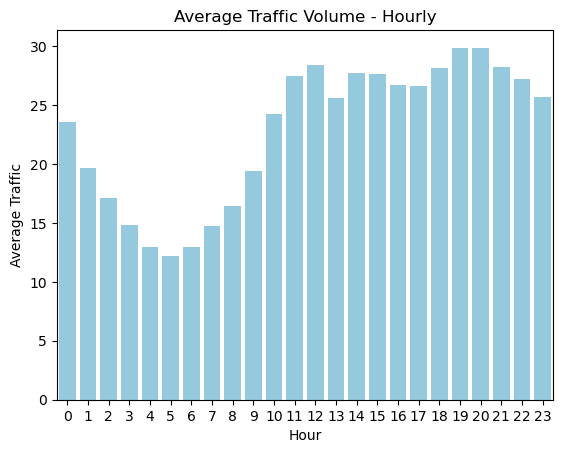

In [85]:
import numpy as np

import seaborn as sns

sns.barplot(x='Hour', y='Vehicles', data=hourly_traffic_analysis, color='skyblue')
plt.title('Average Traffic Volume - Hourly')
plt.xlabel('Hour')
plt.ylabel('Average Traffic')
plt.show()

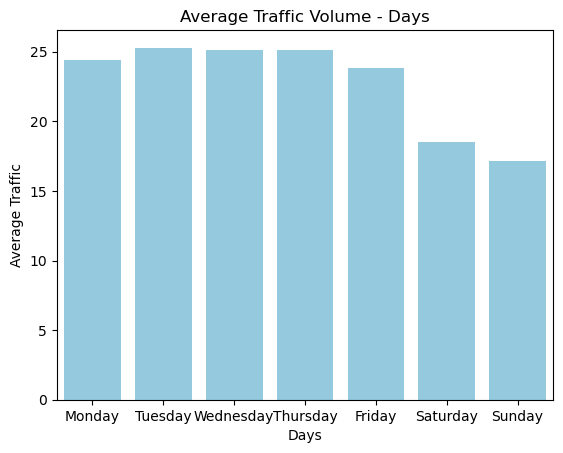

In [91]:
sns.barplot(x='Day', y='Vehicles', data= weekly_traffic_analysis, color='skyblue')
plt.title('Average Traffic Volume - Days')
plt.xlabel('Days')
plt.ylabel('Average Traffic')
plt.show()

In [117]:
import numpy as np 
from sklearn.linear_model import LinearRegression

df = pd.read_csv('traffic_data.csv')
df['DateTime'] = pd.to_datetime(df['DateTime'])

df.set_index('DateTime', inplace=True)
traffic_based_on_month = df.resample('M').mean()

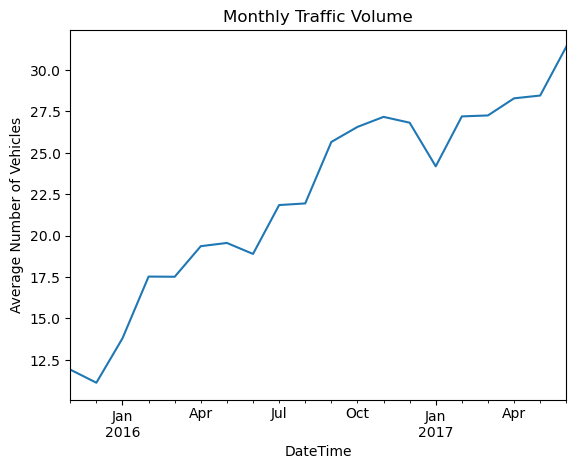

In [120]:
traffic_based_on_month['Vehicles'].plot(title='Monthly Traffic Volume')
plt.ylabel('Average Number of Vehicles')
plt.show()

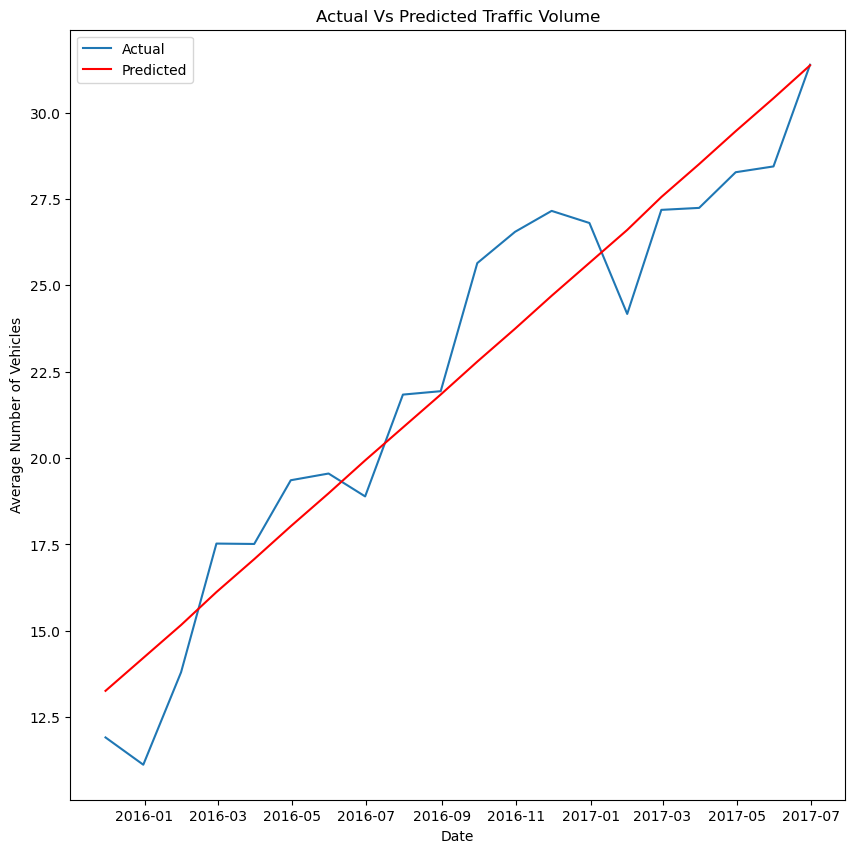

In [126]:
# Linear Regression 

X = np.arange(len(traffic_based_on_month)).reshape(-1, 1)  
y = traffic_based_on_month['Vehicles'].values 


first_pred_model = LinearRegression()
first_pred_model.fit(X, y)

predicted = first_pred_model.predict(X)

plt.figure(figsize=(10, 10))
plt.plot(monthly_traffic.index, y, label='Actual')
plt.plot(monthly_traffic.index, predicted, label='Predicted', color='red')
plt.title('Actual Vs Predicted Traffic Volume')
plt.xlabel('Date')
plt.ylabel('Average Number of Vehicles')
plt.legend()
plt.show()

In [129]:
average_traffic_junction = df.groupby('Junction')['Vehicles'].mean()
average_traffic_junction

Junction
1    45.052906
2    14.253221
3    13.694010
4     7.251611
Name: Vehicles, dtype: float64

In [143]:
#Random Forest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


new_df_RF = pd.read_csv('traffic_data.csv')


new_df_RF['DateTime'] = pd.to_datetime(new_df_RF['DateTime'])

new_df_RF['Hour'] = new_df_RF['DateTime'].dt.hour

new_df_RF['Day'] = new_df_RF['DateTime'].dt.dayofweek


new_df_RF = pd.get_dummies(new_df_RF, columns=['Junction'], drop_first=True)

features = ['Hour', 'Day', 'Junction_2', 'Junction_3', 'Junction_4']
target = 'Vehicles'

threshold = 10  

new_df_RF['TrafficLevel'] = (new_df_RF[target] > threshold).astype(int)

train_data, test_data = train_test_split(new_df_RF, test_size=0.4)

X_train, y_train = train_data[features], train_data['TrafficLevel']
X_test, y_test = test_data[features], test_data['TrafficLevel']

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
S
print(f'Accuracy: {accuracy:.2%}')

Accuracy: 83.38%


In [223]:
import pandas as pd
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier

def pred_traffic_level(date, hour, junction):
    input_datetime = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
    day = input_datetime.weekday()
    
    input_data = pd.DataFrame({
        'Hour': [hour],
        'Day': [day],
        'Junction_2': [1 if junction == 2 else 0],
        'Junction_3': [1 if junction == 3 else 0],
        'Junction_4': [1 if junction == 4 else 0]
    })
    
    traffic_level = classifier.predict(input_data[features])[0]
    
    if traffic_level == 0:
        return 'Low Traffic'
    elif traffic_level == 1:
        return 'High Traffic'
    else:
        return 'Unknown'


date = '2024-04-20 20:30:00'
hour = 20
junction = 1  

predicted_traffic_level = predict_traffic_level(date, hour, junction)
print(f'Predicted Traffic Level: {predicted_traffic_level}')

Predicted Traffic Level: High Traffic


In [217]:
from sklearn.linear_model import LogisticRegression


logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train, y_train)
logistic_predictions = lr_classifier.predict(X_test)
logistic_accuracy = accuracy_score(y_test, lr_predictions)

print('\nLogistic Regression :')
print(f'Accuracy: {logistic_accuracy:.2%}')


Logistic Regression :
Accuracy: 79.16%


In [219]:
from sklearn.svm import SVC

sv_machine_classifier = SVC(random_state=42)
sv_machine_classifier.fit(X_train, y_train)
sv_machine_predictions = svm_classifier.predict(X_test)
sv_machine_accuracy = accuracy_score(y_test, svm_predictions)
sv_machine_classification_report = classification_report(y_test, svm_predictions)

print('\nSupport Vector Machine (SVM) Classifier:')
print(f'Accuracy: {sv_machine_accuracy:.2%}')


Support Vector Machine (SVM) Classifier:
Accuracy: 82.55%
